# 0. Import Basic Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/75/x8j8lqzj7q7bmhtsytmd7nbh0000gn/T/ipykernel_1993/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Data Downloading

## 1.1. Download Raw data
Following code will download datas from https://insideairbnb.com/get-the-data/, this will download datas 34 US cities.

This will create a folder in your local environment path "data/raw".


In [ ]:
# Installation of Non-Standard Libraries(other device may use pip)
!pip3 install -r requirements.txt

In [10]:
import os
import requests
import gzip
import shutil
from bs4 import BeautifulSoup

# URL of the website to scrape
url = "https://insideairbnb.com/get-the-data/"

# Directory to save the downloaded files
download_dir = "data/raw"

# Count downloaded files
file_count = 0

# Create the directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Function to download and convert a .csv.gz file
def download_and_convert_file(url, dest):
    response = requests.get(url)
    if response.status_code == 200:
        temp_gz_path = dest + '.gz'
        with open(temp_gz_path, 'wb') as f:
            f.write(response.content)
        with gzip.open(temp_gz_path, 'rb') as f_in:
            with open(dest, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove(temp_gz_path)
        print(f"Downloaded and converted: {dest}")
    else:
        print(f"Failed to download: {url}")

# Scrape the webpage to get the URLs of the .csv.gz files
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all .csv.gz links
links = soup.find_all('a', href=True)
csv_gz_links = [link['href'] for link in links if link['href'].endswith('listings.csv.gz')]

# Download and convert each .csv.gz file
for link in csv_gz_links:
    parts = link.split("/")
    country = parts[3]
    state = parts[4]
    city = parts[5]
    date = parts[6]
    if (country == 'united-states'):
        original_file_name = parts[-1].replace('.csv.gz', '.csv')
        new_file_name = f"{country}_{state}_{city}_{date}_{original_file_name}"
        download_and_convert_file(link, os.path.join(download_dir, new_file_name))
        file_count += 1

print(f"All {file_count} files downloaded and converted.")

Downloaded and converted: data/raw/united-states_ny_albany_2024-06-07_listings.csv
Downloaded and converted: data/raw/united-states_nc_asheville_2024-06-21_listings.csv
Downloaded and converted: data/raw/united-states_tx_austin_2024-06-17_listings.csv
Downloaded and converted: data/raw/united-states_ma_boston_2024-06-22_listings.csv
Downloaded and converted: data/raw/united-states_mt_bozeman_2024-06-14_listings.csv
Downloaded and converted: data/raw/united-states_fl_broward-county_2024-06-26_listings.csv
Downloaded and converted: data/raw/united-states_ma_cambridge_2024-06-29_listings.csv
Downloaded and converted: data/raw/united-states_il_chicago_2024-06-21_listings.csv
Downloaded and converted: data/raw/united-states_nv_clark-county-nv_2024-06-22_listings.csv
Downloaded and converted: data/raw/united-states_oh_columbus_2024-06-26_listings.csv
Downloaded and converted: data/raw/united-states_tx_dallas_2024-06-19_listings.csv
Downloaded and converted: data/raw/united-states_co_denver_2

## 1.2. Combine csv files
Combine all 34 csv files in new folder "data/US" named "combined_listings.csv"

In [11]:
import os
import pandas as pd

# Directory containing the individual CSV files
source_dir = "data/raw"
# Directory to save the combined CSV file
destination_dir = "data/US"
# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# List to hold individual dataframes
dataframes = []

# Iterate over all files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith(".csv") and "united-states" in filename:
        file_path = os.path.join(source_dir, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_csv_path = os.path.join(destination_dir, "combined_listings.csv")
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined CSV file saved to {combined_csv_path}")

/var/folders/75/x8j8lqzj7q7bmhtsytmd7nbh0000gn/T/ipykernel_1993/3684539764.py:18: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Combined CSV file saved to data/US/combined_listings.csv


# 2. Data Exploration and Preprocessing

Note: In practice, the process of data analysis often involves a combination of both data preprocessing and data exploration, and the order can be somewhat iterative.

## 2.1. Initial Data Exploration

Objective: Get a general sense of the data.

### Load the data.

In [12]:
raw_data = pd.read_csv('./data/US/combined_listings.csv')

/var/folders/75/x8j8lqzj7q7bmhtsytmd7nbh0000gn/T/ipykernel_1993/999191122.py:1: DtypeWarning: Columns (0,2,22,28,29,41,45,46,54,68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('./data/US/combined_listings.csv')


### Conduct preliminary descriptive statistics (shape, scales etc.).

In [13]:
raw_data.shape

(276390, 75)

In [14]:
raw_data.describe().round(2)

host_id  host_total_listings_count   latitude  longitude  \
count  2.763900e+05                  276356.00  276371.00  276371.00   
mean   1.838283e+08                     222.69      34.53    -106.04   
std    1.802587e+08                     879.75       7.06      27.81   
min    1.000000e+00                       0.00       1.00    -159.71   
25%    2.704271e+07                       2.00      30.29    -118.64   
50%    1.087478e+08                       5.00      35.54    -115.09   
75%    3.396972e+08                      35.00      40.69     -80.14   
max    5.869174e+08                    9013.00      47.73    1125.00   

       accommodates  bathrooms   bedrooms       beds  maximum_nights  \
count     276371.00  230818.00  263370.00  230191.00    2.763710e+05   
mean           4.37       1.56       1.78       2.30    8.712110e+03   
std            8.02       0.96       1.32       2.06    4.089523e+06   
min            1.00       0.00       0.00       0.00    0.000000e+00   
25%            2.00       1.00       1.00       1.00    9.000000e+01   
50%            4.00       1.00       1.00       2.00    3.650000e+02   
75%            6.00       2.00       2.00       3.00    1.125000e+03   
max         1125.00      50.00      50.00     132.00    2.147484e+09   

       minimum_minimum_nights  ...  review_scores_cleanliness  \
count               276314.00  ...                  216907.00   
mean                    13.71  ...                       4.76   
std                     26.91  ...                       0.39   
min                      0.00  ...                       0.00   
25%                      1.00  ...                       4.70   
50%                      2.00  ...                       4.88   
75%                     30.00  ...                       5.00   
max                   1250.00  ...                       5.00   

       review_scores_checkin  review_scores_communication  \
count              216875.00                    216901.00   
mean                    4.86                         4.86   
std                     0.32                         0.33   
min                     0.00                         0.00   
25%                     4.86                         4.86   
50%                     4.96                         4.96   
75%                     5.00                         5.00   
max                     5.00                         5.00   

       review_scores_location  review_scores_value  \
count               216870.00            216871.00   
mean                     4.80                 4.71   
std                      0.34                 0.41   
min                      0.00                 0.00   
25%                      4.75                 4.64   
50%                      4.90                 4.80   
75%                      5.00                 4.93   
max                      5.00                 5.00   

       calculated_host_listings_count  \
count                       276352.00   
mean                            32.70   
std                             94.22   
min                              1.00   
25%                              1.00   
50%                              3.00   
75%                             16.00   
max                            842.00   

       calculated_host_listings_count_entire_homes  \
count                                    276352.00   
mean                                         25.85   
std                                          83.56   
min                                           0.00   
25%                                           1.00   
50%                                           1.00   
75%                                           9.00   
max                                         842.00   

       calculated_host_listings_count_private_rooms  \
count                                     276352.00   
mean                                           6.18   
std                                           45.28   
min           

In [15]:
raw_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Discussion:

1. There are too many unnecessary features.

### Generate basic visualizations (histograms, *scatter plots（data is large kernel crashed）*, etc.).

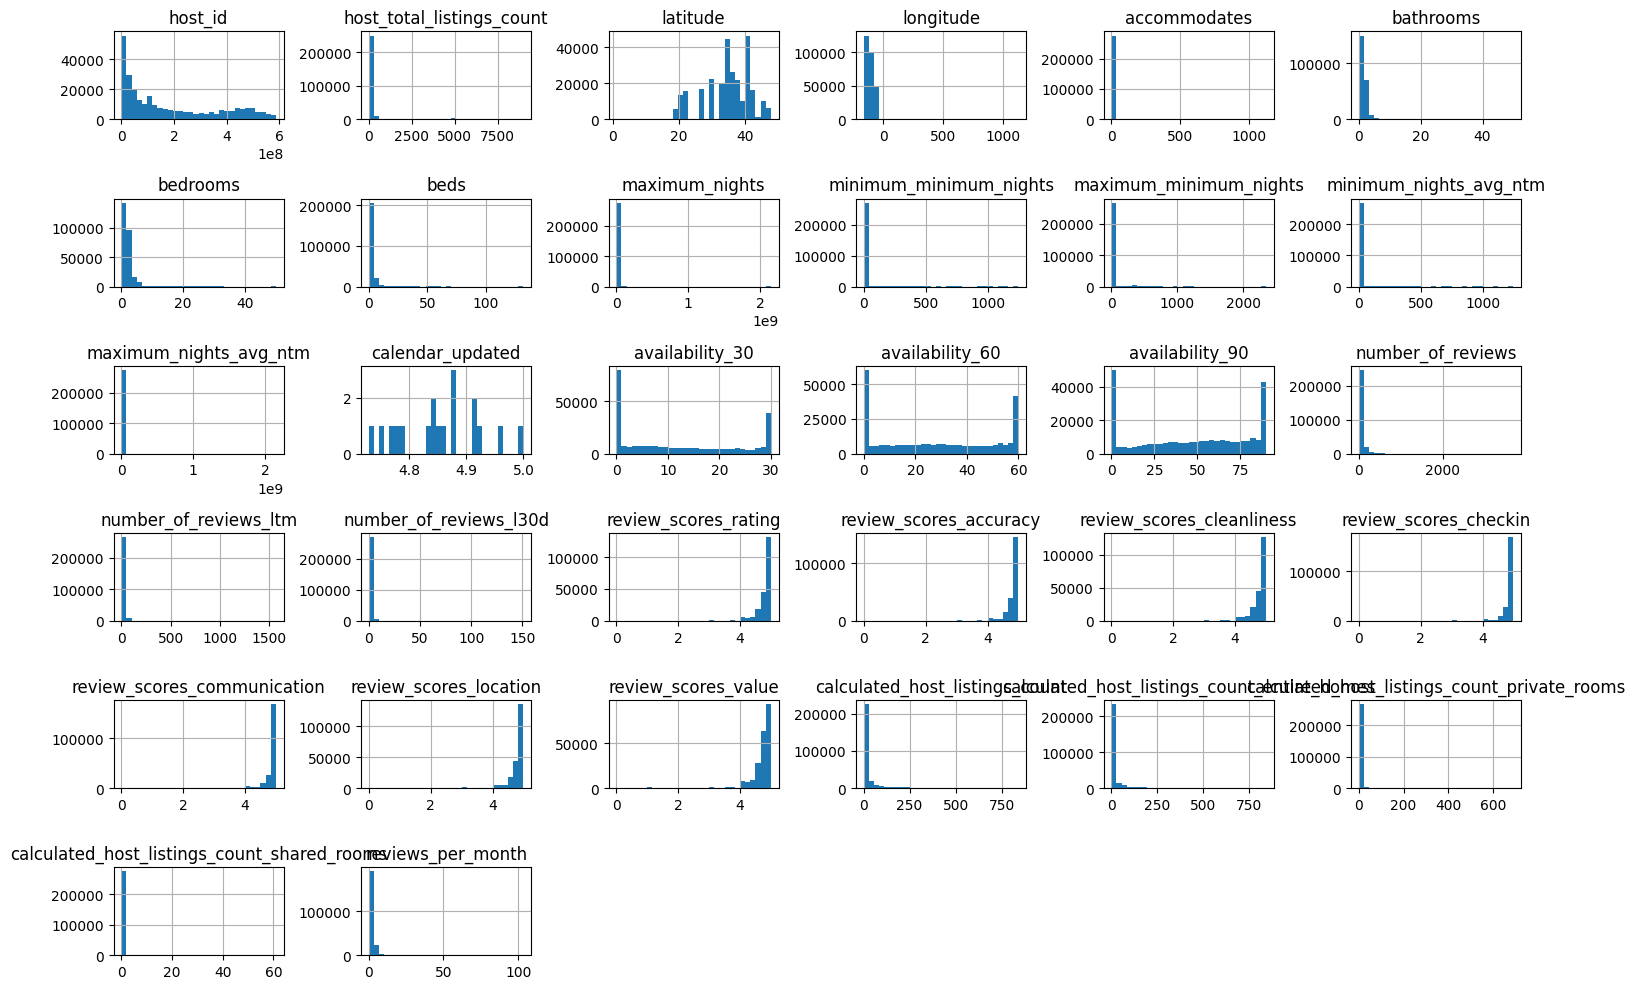

In [15]:
# Some overview to the data distribution
raw_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Discussion:
1. Apperantely there are no normally distributed datas, thereby later we decide to do minmax normalization in preprocessing.

### Look for obvious issues such as missing values, duplicates, or outliers.

id                                                  7
listing_url                                         3
scrape_id                                           3
last_scraped                                        3
name                                                3
                                                ...  
calculated_host_listings_count                     38
calculated_host_listings_count_entire_homes        38
calculated_host_listings_count_private_rooms       38
calculated_host_listings_count_shared_rooms        38
reviews_per_month                               59237
Length: 72, dtype: int64


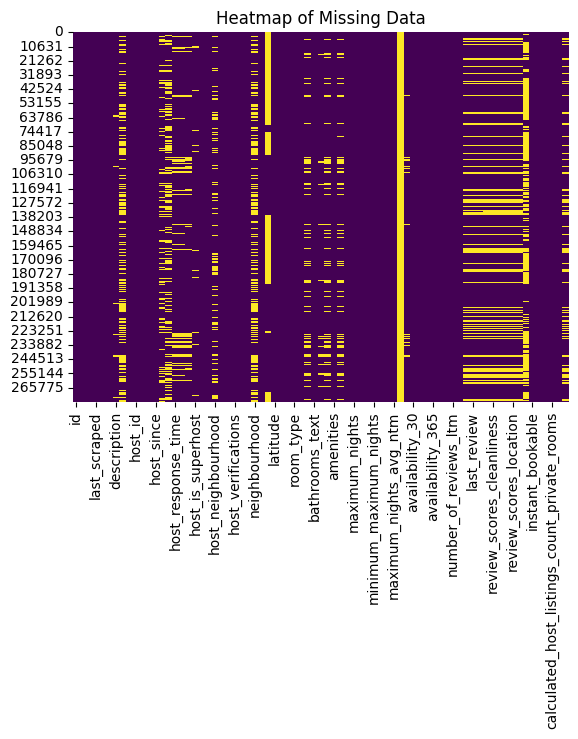

In [16]:
# Check missing data summary
missing_data = raw_data.isnull().sum()
print(missing_data[missing_data > 0])

# Visualizing missing raw_data
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

In [17]:
# Consider number of duplicate samples with in a dataframe, 
raw_data_num_of_duplicates = raw_data.drop(columns=['price']).duplicated().sum()
raw_data_num_of_duplicates

0

Discussion

1. Need to deal with missing values
2. Reduce the features to get some duplicates and drop them. 
3. Do we need to check outliers for raw_data?

## 2.2. Data Proprocessing

Objective: Clean and prepare the data for detailed analysis and modeling.

### Choose columns

In [18]:
data_few_feature = raw_data[['longitude', 'latitude', 'room_type', 'price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews', 'calculated_host_listings_count', 'availability_30', 'availability_60']] # 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','host_response_rate', 'host_acceptance_rate' , 'availability_90', 'availability_365'
print(data_few_feature.columns)
print(data_few_feature.shape)

Index(['longitude', 'latitude', 'room_type', 'price', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'review_scores_rating', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_30', 'availability_60'],
      dtype='object')
(276390, 14)


### Handle missing values (imputation, deletion)

In [19]:
# Showing the number of cells with NA values with in each columns.
data_few_feature.isnull().sum()

longitude                            19
latitude                             19
room_type                            19
price                             45980
accommodates                         19
bathrooms                         45572
bedrooms                          13020
beds                              46199
minimum_nights                       19
review_scores_rating              59237
number_of_reviews                    19
calculated_host_listings_count       38
availability_30                      20
availability_60                      20
dtype: int64

In [20]:
# Drop rows that include NA values.
cleaned_data = data_few_feature.dropna()
print(cleaned_data.isnull().sum())
print(cleaned_data.shape)

longitude                         0
latitude                          0
room_type                         0
price                             0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
minimum_nights                    0
review_scores_rating              0
number_of_reviews                 0
calculated_host_listings_count    0
availability_30                   0
availability_60                   0
dtype: int64
(185206, 14)


### Encode categorical variables (Convert non-numerical data in to numarical)

In [21]:
# Convert room_type into integer values
print(cleaned_data['room_type'].unique())
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3} # might be changed later
cleaned_data['room_type'] = cleaned_data['room_type'] .replace(room_type_dict)
print(cleaned_data['room_type'].unique())

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
[0 1 3 2]


/var/folders/75/x8j8lqzj7q7bmhtsytmd7nbh0000gn/T/ipykernel_1993/1018206294.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data['room_type'] = cleaned_data['room_type'] .replace(room_type_dict)
/var/folders/75/x8j8lqzj7q7bmhtsytmd7nbh0000gn/T/ipykernel_1993/1018206294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['room_type'] = cleaned_data['room_type'] .replace(room_type_dict)


In [22]:
# Parse price froms str to float
cleaned_data['price'] = cleaned_data['price'].str.replace('$', '').str.replace(',', '').astype(float)
cleaned_data.describe().round(3)

/var/folders/75/x8j8lqzj7q7bmhtsytmd7nbh0000gn/T/ipykernel_1993/2029159857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['price'] = cleaned_data['price'].str.replace('$', '').str.replace(',', '').astype(float)


longitude    latitude   room_type       price  accommodates  \
count  185206.000  185206.000  185206.000  185206.000    185206.000   
mean     -107.142      34.297       0.206     265.335         4.500   
std        26.275       7.225       0.439    1557.188         2.974   
min      -159.715      18.920       0.000       6.000         1.000   
25%      -121.908      30.255       0.000     100.000         2.000   
50%      -115.140      34.182       0.000     160.000         4.000   
75%       -82.567      40.636       0.000     266.000         6.000   
max       -70.996      47.734       3.000  100000.000        16.000   

        bathrooms    bedrooms        beds  review_scores_rating  \
count  185206.000  185206.000  185206.000            185206.000   
mean        1.543       1.771       2.362                 4.790   
std         0.900       1.289       2.019                 0.357   
min         0.000       0.000       0.000                 1.000   
25%         1.000       1.000       1.000                 4.740   
50%         1.000       1.000       2.000                 4.890   
75%         2.000       2.000       3.000                 5.000   
max        17.000      50.000      61.000                 5.000   

       number_of_reviews  calculated_host_listings_count  availability_30  \
count         185206.000                      185206.000       185206.000   
mean              61.101                          23.901           12.274   
std               99.713                          67.400           10.347   
min                1.000                           1.000            0.000   
25%                6.000                           1.000            3.000   
50%               23.000                           3.000           10.000   
75%               73.000                          13.000           21.000   
max             3689.000                         842.000           30.000   

       availability_60  
count       185206.000  
mean            29.787  
std             19.800  
min              0.000  
25%             13.000  
50%             29.000  
75%             48.000  
max             60.000

### Remove the outliners and abnormalities

In [23]:
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# cleaned_data columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
cleaned_data_no_outliers = remove_outliers_iqr(cleaned_data, ['price'],th3=0.6, multiplier=1.5)
cleaned_data_no_outliers.describe()

column: price, lower_bound: -205.0, upper_bound: 435.0


longitude       latitude      room_type          price  \
count  165882.000000  165882.000000  165882.000000  165882.000000   
mean     -106.369560      34.503817       0.222827     167.768130   
std        25.818741       7.154511       0.447809      93.288804   
min      -159.712090      18.920250       0.000000       6.000000   
25%      -121.848325      30.269657       0.000000      96.000000   
50%      -114.086568      35.447040       0.000000     148.000000   
75%       -82.529530      40.654553       0.000000     223.000000   
max       -70.996000      47.734087       3.000000     435.000000   

        accommodates     bathrooms       bedrooms           beds  \
count  165882.000000  165882.00000  165882.000000  165882.000000   
mean        4.057239       1.39797       1.579014       2.090540   
std         2.534480       0.68817       1.083865       1.641329   
min         1.000000       0.00000       0.000000       0.000000   
25%         2.000000       1.00000       1.000000       1.000000   
50%         4.000000       1.00000       1.000000       2.000000   
75%         6.000000       2.00000       2.000000       3.000000   
max        16.000000      17.00000      50.000000      36.000000   

       review_scores_rating  number_of_reviews  \
count         165882.000000      165882.000000   
mean               4.783277          64.028954   
std                0.360731         103.231616   
min                1.000000           1.000000   
25%                4.730000           6.000000   
50%                4.880000          25.000000   
75%                5.000000          77.000000   
max                5.000000        3689.000000   

       calculated_host_listings_count  availability_30  availability_60  
count                   165882.000000    165882.000000    165882.000000  
mean                        22.641360        12.217854        29.836311  
std                         65.103478        10.375076        19.869034  
min                          1.000000         0.000000         0.000000  
25%                          1.000000         2.000000        12.000000  
50%                          3.000000        10.000000        30.000000  
75%                         12.000000        21.000000        48.000000  
max                        842.000000        30.000000        60.000000

### Normalization: Minmax implementation

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_data_norm = pd.DataFrame(scaler.fit_transform(cleaned_data_no_outliers), columns=cleaned_data_no_outliers.columns)
cleaned_data_norm.head()

longitude  latitude  room_type     price  accommodates  bathrooms  \
0   0.784442  0.383175   0.000000  0.125874      0.066667   0.058824   
1   0.785297  0.383194   0.000000  0.335664      0.066667   0.058824   
2   0.785206  0.383483   0.000000  0.184149      0.133333   0.058824   
3   0.785375  0.383296   0.000000  0.069930      0.066667   0.058824   
4   0.785123  0.383422   0.333333  0.172494      0.066667   0.117647   

   bedrooms      beds  minimum_nights  review_scores_rating  \
0      0.02  0.027778        0.000000                0.9725   
1      0.02  0.000000        0.002002                0.9875   
2      0.02  0.055556        0.002002                0.9775   
3      0.04  0.055556        0.029029                0.9900   
4      0.02  0.027778        0.000000                0.9550   

   number_of_reviews  calculated_host_listings_count  availability_30  \
0           0.136117                        0.000000         0.000000   
1           0.083243                        0.000000         0.866667   
2           0.169740                        0.002378         0.233333   
3           0.135846                        0.000000         0.500000   
4           0.253254                        0.001189         0.366667   

   availability_60  
0         0.000000  
1         0.933333  
2         0.533333  
3         0.750000  
4         0.483333

<Axes: >

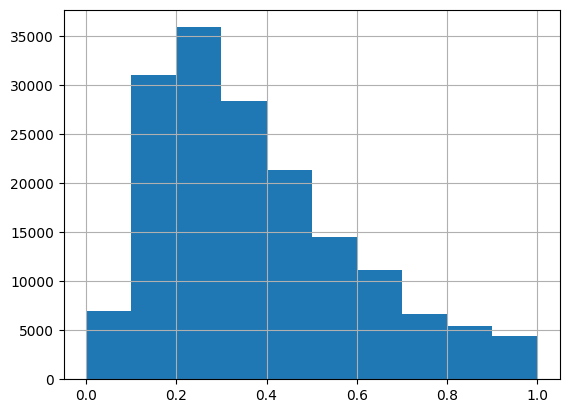

In [64]:
cleaned_data_norm['price'].hist()

### Consider number of duplicate samples with in a features and removing them. 

In [25]:
number_of_duplicates = cleaned_data_norm.drop(columns=['price']).duplicated().sum()
print(f'Before droping the duplicate, there are {number_of_duplicates} duplicates')
data = cleaned_data_norm.drop_duplicates(subset=['longitude', 'latitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews', 'calculated_host_listings_count', 'availability_30', 'availability_60'])
number_of_duplicates = data.drop(columns=['price']).duplicated().sum()
print(f'After droping the duplicate, there are {number_of_duplicates} duplicates')
data.shape

Before droping the duplicate, there are 214 duplicates
After droping the duplicate, there are 0 duplicates


(165668, 14)

Discuussion:
1. Note that our data size shrink to 165668 from 276390 samples.

## 2.3. Detailed Data Exploration

Objective: Gain deeper insights into the cleaned and preprocessed data.

### Perform more detailed statistical analyses

In [73]:
data.describe()

longitude       latitude      room_type          price  \
count  165668.000000  165668.000000  165668.000000  165668.000000   
mean        0.601274       0.540821       0.074265       0.376950   
std         0.290982       0.248306       0.149276       0.217465   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.426819       0.393884       0.000000       0.209790   
50%         0.514322       0.573071       0.000000       0.331002   
75%         0.869986       0.754295       0.000000       0.505828   
max         1.000000       1.000000       1.000000       1.000000   

        accommodates      bathrooms       bedrooms           beds  \
count  165668.000000  165668.000000  165668.000000  165668.000000   
mean        0.203861       0.082246       0.031594       0.058080   
std         0.169032       0.040495       0.021683       0.045611   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.066667       0.058824       0.020000       0.027778   
50%         0.200000       0.058824       0.020000       0.055556   
75%         0.333333       0.117647       0.040000       0.083333   
max         1.000000       1.000000       1.000000       1.000000   

       minimum_nights  review_scores_rating  number_of_reviews  \
count   165668.000000         165668.000000      165668.000000   
mean         0.009831              0.945768           0.017112   
std          0.019761              0.090204           0.028003   
min          0.000000              0.000000           0.000000   
25%          0.000000              0.932500           0.001356   
50%          0.001001              0.970000           0.006508   
75%          0.028028              1.000000           0.020607   
max          1.000000              1.000000           1.000000   

       calculated_host_listings_count  availability_30  availability_60  
count                   165668.000000    165668.000000    165668.000000  
mean                         0.025530         0.407157         0.497200  
std                          0.076865         0.345687         0.331015  
min                          0.000000         0.000000         0.000000  
25%                          0.000000         0.066667         0.200000  
50%                          0.002378         0.333333         0.500000  
75%                          0.013080         0.700000         0.800000  
max                          1.000000         1.000000         1.000000

### Create more sophisticated visualizations to uncover hidden patterns.

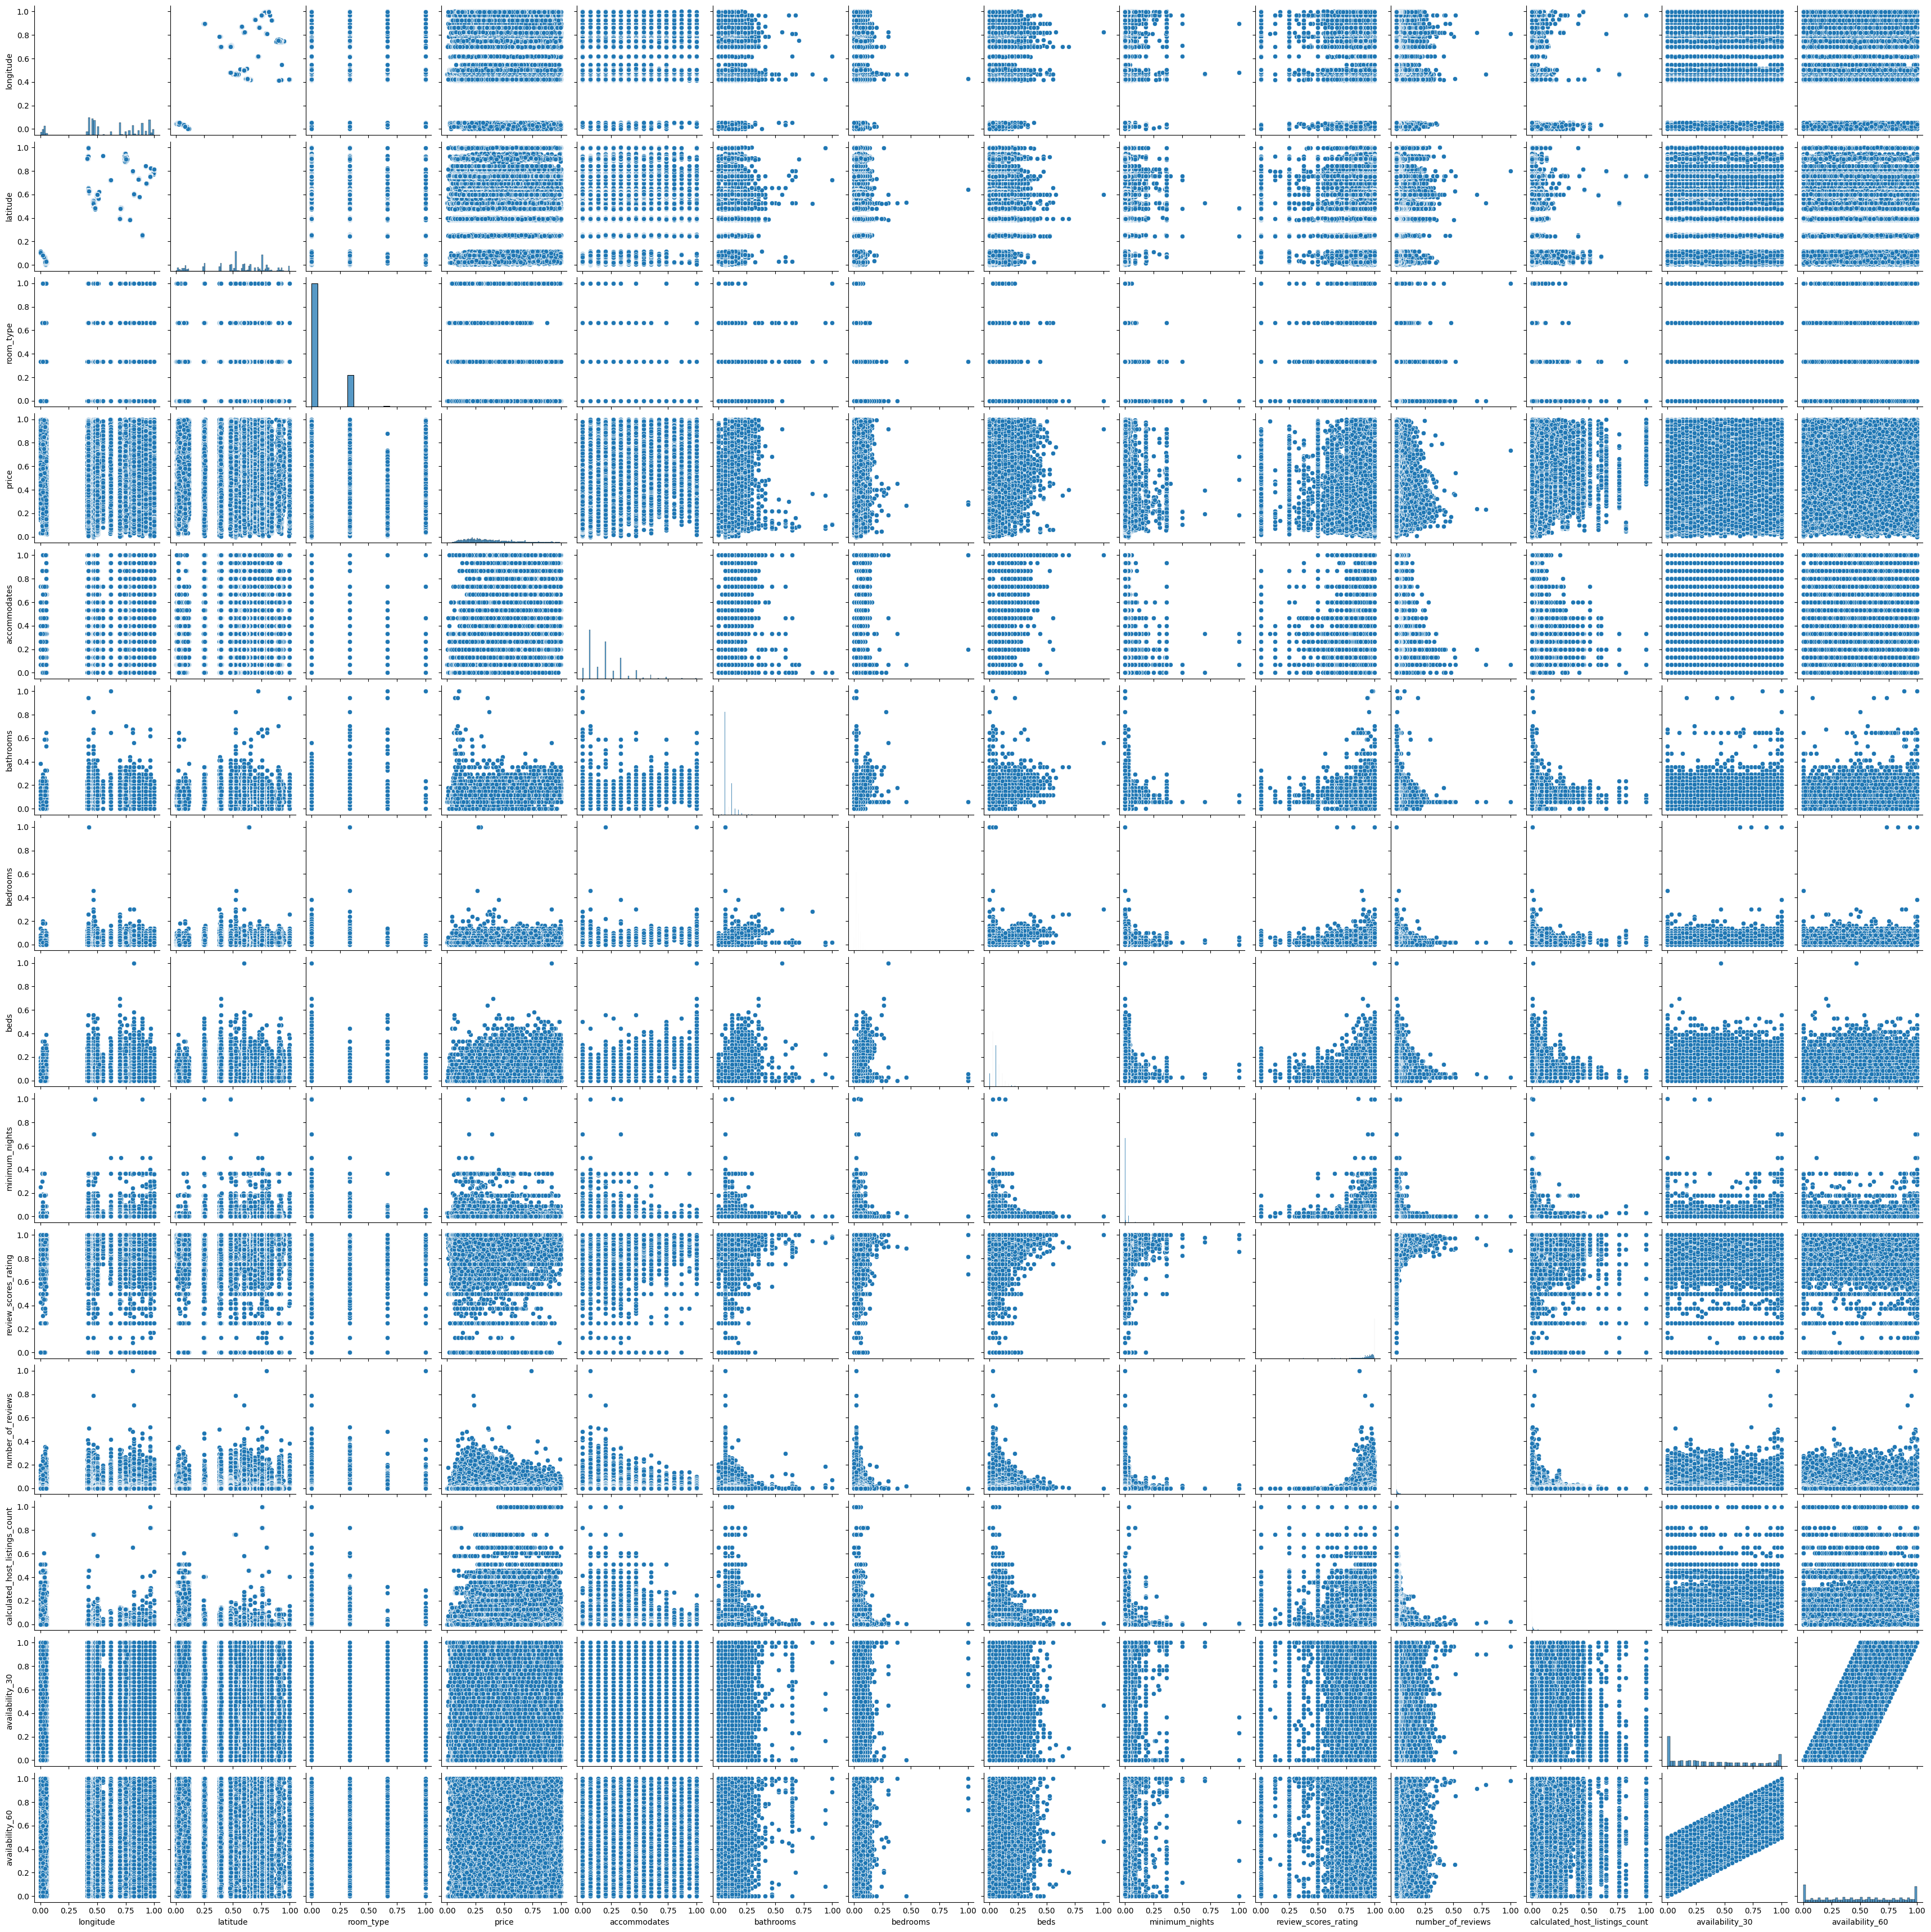

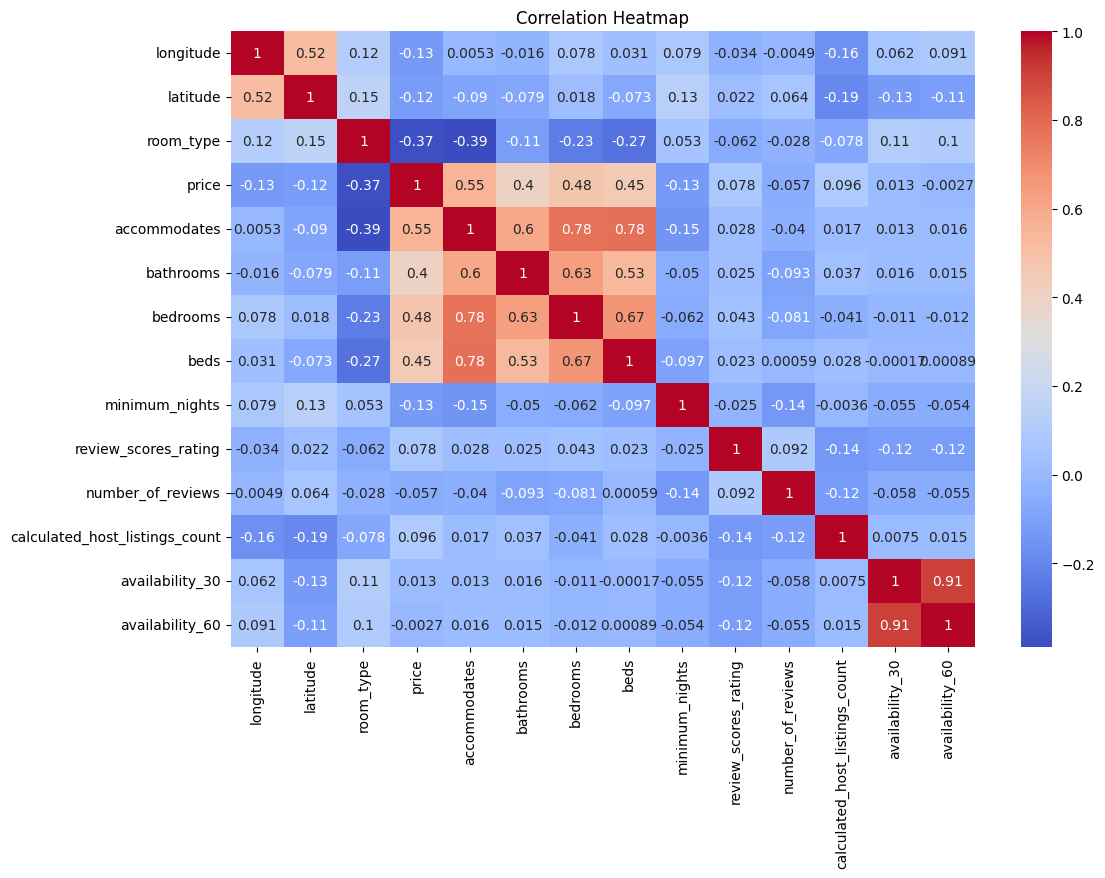

In [75]:
# Pair plot
sns.pairplot(data)
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Discussions: 
1. ...
2. 

## 2.4. X and y Preprocessing

In [26]:
from sklearn.model_selection import train_test_split

target = 'price'

X = data.drop(columns=['price'])
y = data[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_test.shape)

(132534, 13)
(33134, 1)


Discussion:
1. ...

# 3. Initial Model Building (AKA Base Line Model)

Objective: Choose the most appropriate initial model based on data exploration and preprocessing insights.

We may use with keras sequential()

Activities:
1. Review the distribution of your target variable and main features.*
2. Ensure that the chosen model aligns with the nature of the data (e.g., linear vs. non-linear, categorical vs. numerical).*
3. Start with Simple Models simple baseline models like *
      1. Linear Regression for regression tasks 
      2. or Logistic Regression for classification tasks.
4. Ensure your data roughly meets the assumptions of the chosen simple model (e.g., linearity for Linear Regression).*
5. Reason or Discuss why choose this Initial Model *

Determine Network Architecture:
1. Number of Layers: Start with a simple architecture, such as one or two hidden layers.
2. Number of Nodes per Layer: Begin with a small number of nodes, such as 10-50 per hidden layer, depending on the complexity of your data.
3. Activation Functions: Choose activation functions based on the nature of the data and the task:
   1. ReLU (Rectified Linear Unit): Common for hidden layers due to its simplicity and effectiveness.
   2. Sigmoid or Softmax: Use Sigmoid for binary classification outputs and Softmax for multi-class classification outputs.
   3. Linear Activation: Often used in the output layer for regression tasks.

In [ ]:
!pip3 install scikeras keras tensorflow

## 3.1. Set Hyperparameters for baseline model. 

In [27]:
input_size      = X_train.shape[1]
hidden_size     = 524
output_size     = y_train.shape[1]
batch_size      = 1000
epochs          = 100
learning_rate   = 0.001

In [28]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.optimizers import SGD
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
# from scikeras.wrappers import KerasClassifier, KerasRegressor
# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## 3.2. Model init and compile

In [29]:
model = Sequential()
model.add(layers.Dense(units=hidden_size, activation='relu', input_dim=input_size))
model.add(layers.Dense(units=hidden_size, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=hidden_size, activation='relu'))
model.add(layers.Dropout(0.2))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=hidden_size, activation='relu'))
model.add(layers.Dense(units=output_size, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

/Users/markxu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3.3. Model Training

In [30]:
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=[earlystop])

# Evaluate the model
eval_result = model.evaluate(X_test, y_test)
print(f"Best test mse: {eval_result[1]}")

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 9/100
133/133 ━━━━━━━━━━━━━━━━━━━━

# 4. Model Evaluation

Metrics and Technique(AKA Method)

1. Classification Models' Metrics
   1. Accuracy: The proportion of correctly classified instances among the total instances.
   2. Precision: The proportion of true positive instances among the instances predicted as positive.
   3. Recall (Sensitivity or True Positive Rate): The proportion of true positive instances among the actual positive instances.
   4. F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both.
   5. Confusion Matrix: A table showing the true positives, true negatives, false positives, and false negatives.
   6. ROC Curve (Receiver Operating Characteristic Curve): A graphical representation of the true positive rate vs. the false positive rate at various threshold settings.
   7. AUC (Area Under the ROC Curve): A single metric that summarizes the ROC curve, indicating the model's ability to discriminate between classes.
   8. Log Loss (Cross-Entropy Loss): Measures the performance of a classification model where the output is a probability value between 0 and 1.
   9. Precision-Recall Curve: A graphical representation of precision vs. recall at various threshold settings.
   10. Specificity (True Negative Rate): The proportion of true negative instances among the actual negative instances.
2. Regression Models' Metrics
   1. Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values.
   2. Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values.
   3. Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predicted and actual values.
   4. R-Squared (Coefficient of Determination): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
   5. Adjusted R-Squared: Adjusted version of R-Squared that accounts for the number of predictors in the model.
   6. Mean Absolute Percentage Error (MAPE): The average of the absolute percentage differences between the predicted and actual values.
   7. Median Absolute Error: The median of the absolute differences between the predicted and actual values.
3. Clustering Models' Metrics
   1. Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.
   2. Davies-Bouldin Index: Measures the average similarity ratio of each cluster with the one most similar to it.
   3. Inertia (Within-Cluster Sum of Squares): Measures the compactness of the clusters, with lower values indicating better-defined clusters.
   4. Calinski-Harabasz Index (Variance Ratio Criterion): Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion.
4. Time Series Models' Metrics
   1. Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values.
   2. Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values.
   3. Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predicted and actual values.
   4. Mean Absolute Percentage Error (MAPE): The average of the absolute percentage differences between the predicted and actual values.
   5. Mean Squared Logarithmic Error (MSLE): The average of the squared logarithmic differences between the predicted and actual values.
5. Model Evaluation Techniques
   1. Cross-Validation: A technique to assess how the results of a statistical analysis will generalize to an independent data set, commonly k-fold cross-validation.
   2. Train-Test Split: Splitting the dataset into a training set and a test set to evaluate the model's performance.
   3. Bootstrapping: A resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
   4. Learning Curve: A plot of model learning performance over time or over different training set sizes.
   5. Validation Curve: A plot of training and validation scores with respect to the model hyperparameters.

## 4.1. Choose Some Evaluation Methods and Implements them

Going to use MSE as metrics and Kfold Cross Validation method.


### Kfold Cross Validation with metric MSE

In [96]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

estimator = KerasRegressor(model=model, epochs=20, batch_size=100, verbose=1)
kfold = RepeatedKFold(n_splits = 5, n_repeats = 5)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = 1)
results.mean() 

Epoch 1/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0239 - mse: 0.0239
Epoch 2/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0227 - mse: 0.0227
Epoch 3/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0222 - mse: 0.0222
Epoch 4/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0224 - mse: 0.0224
Epoch 5/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0219 - mse: 0.0219
Epoch 6/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0218 - mse: 0.0218
Epoch 7/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0217 - mse: 0.0217
Epoch 8/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0217 - mse: 0.0217
Epoch 9/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0215 - mse: 0.0215
Epoch 10/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0213 - mse: 0.0213
Epoch 11/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0212 - mse: 0.0212
Epoch 12/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0212 - mse: 0.0212
E

0.5539661775947667

## 4.2. Reasons for Choosing Those Metrics and Techniques

MSE metrics for Regression Metrics.

Cross-validation:
1. Mitigates Overfitting: By splitting the data into multiple training and validation sets, cross-validation ensures that the model does not rely too heavily on any single subset of the data, reducing the risk of overfitting.
2. Provides a Robust Performance Estimate: It uses multiple iterations of training and validation, offering a more accurate and reliable estimate of the model's performance across different data subsets.
3. Ensures Generalizability: By testing the model on various subsets, cross-validation helps ensure that the model generalizes well to new, unseen data, making it more robust in real-world applications.

## 4.3. Discussion
1. Result shows the consist values. 

# 5. Hyperparameter Tuning
Objective: Optimize the hyperparameters of your model to improve its performance.

## 5.1. import necessary models

In [43]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
# from scikeras.wrappers import KerasClassifier, KerasRegressor

# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import numpy as np
import pandas as pd

import keras_tuner
from tensorflow import keras
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error

## 5.2. Build Models and set tuner, select tuning method

Select an appropriate method for hyperparameter tuning. Common methods include:
1. Grid Search: Exhaustively search through a specified subset of hyperparameters. (This is in our course material.)
2. Random Search: Randomly sample from a specified subset of hyperparameters.
3. Bayesian Optimization: Use probabilistic models to select the most promising hyperparameters based on past evaluations.


We going to Random Search.

In [44]:
def buildHPmodel(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # input layer
    model.add(layers.Dense(
            units=X_train.shape[1],
            activation=hp.Choice(f"activation_{0}", ["relu", "tanh", "sigmoid"]),
        ))
    for i in range(hp.Int("num_layers", 1, 10)):
        model.add(
            layers.Dense(
                # Tune number of units separately
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice(f"activation_{i}", ["relu", "tanh", "sigmoid"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(y_train.shape[1], activation="sigmoid"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mae",
        metrics=["mse"],
    )
    return model

    print(y_train.shape[1])

In [45]:
tuner = keras_tuner.RandomSearch(
    hypermodel=buildHPmodel,
    objective="val_loss",
    max_trials=10,
    # seed=42,
    executions_per_trial=1,
    overwrite=True,
    #hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    #max_retries_per_trial=0,
    #max_consecutive_failed_trials=3
)

In [46]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


## 5.3. Split Train dataset into two part Train and Validation data sets.

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 0) # try change random_state

## 5.4. Run tuning process

In [48]:
from sklearn.model_selection import KFold
# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

all_scores = []
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    tuner.search(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=5)

    # Get the best model for the current fold
    best_model = tuner.get_best_models(num_models=1)[0]

    # Evaluate the model on the validation set
    val_loss, val_mse = best_model.evaluate(X_val_fold, y_val_fold)
    all_scores.append(val_mse)

# Average validation MSE across all folds
average_mse = np.mean(all_scores)
print(f"Average MSE from cross-validation: {average_mse}")
# tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Trial 10 Complete [00h 00m 11s]
val_loss: 0.11747174710035324

Best val_loss So Far: 0.11528567969799042
Total elapsed time: 00h 03m 18s
  1/350 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - loss: 0.1335 - mse: 0.0419

/Users/markxu/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.1166 - mse: 0.0261
 64/350 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.1092 - mse: 0.0228 

/Users/markxu/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.1151 - mse: 0.0254
 80/350 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.1120 - mse: 0.0235 

/Users/markxu/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.1151 - mse: 0.0252
 68/350 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.1105 - mse: 0.0238 

/Users/markxu/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.1142 - mse: 0.0250
  1/350 ━━━━━━━━━━━━━━━━━━━━ 38s 111ms/step - loss: 0.1105 - mse: 0.0243

/Users/markxu/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.1146 - mse: 0.0251
Average MSE from cross-validation: 0.025336156040430068


## 5.4.  Analyze Results

In [49]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
activation_0: relu
num_layers: 4
units_0: 288
dropout: True
lr: 0.0019272521621405724
units_1: 128
activation_1: relu
units_2: 352
activation_2: relu
units_3: 480
activation_3: sigmoid
units_4: 320
activation_4: sigmoid
units_5: 256
activation_5: sigmoid
units_6: 128
activation_6: tanh
units_7: 160
activation_7: tanh
units_8: 64
activation_8: sigmoid
units_9: 224
activation_9: sigmoid
Score: 0.11528567969799042

Trial 00 summary
Hyperparameters:
activation_0: relu
num_layers: 10
units_0: 480
dropout: True
lr: 0.0027673623449558913
units_1: 32
activation_1: relu
units_2: 32
activation_2: relu
units_3: 32
activation_3: relu
units_4: 32
activation_4: relu
units_5: 32
activation_5: relu
units_6: 32
activation_6: relu
units_7: 32
activation_7: relu
units_8: 32
activation_8: relu
units_9: 32
activation_9: relu
Score: 0.11641774326562881

Trial 09

The best score here is worst than priceprediction_model_update.ipynb in milestone3

In [50]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [51]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
eval_result = model.evaluate(X_test, y_test)
print(f"Best test mse: {eval_result[1]}")

Epoch 1/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1436 - mse: 0.0373 - val_loss: 0.1218 - val_mse: 0.0278
Epoch 2/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1222 - mse: 0.0278 - val_loss: 0.1184 - val_mse: 0.0276
Epoch 3/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1197 - mse: 0.0269 - val_loss: 0.1170 - val_mse: 0.0257
Epoch 4/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1184 - mse: 0.0264 - val_loss: 0.1167 - val_mse: 0.0250
Epoch 5/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1177 - mse: 0.0260 - val_loss: 0.1171 - val_mse: 0.0272
Epoch 6/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1167 - mse: 0.0257 - val_loss: 0.1149 - val_mse: 0.0259
Epoch 7/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1160 - mse: 0.0255 - val_loss: 0.1148 - val_mse: 0.0256
Epoch 8/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1152 - mse: 0.0252 - val_loss: 0.1136 - val_mse: 0.0246
Epoch 9/10
1748/1748 ━━━━━━━━━━━━━━━━━━━

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 288)            │         4,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 352)            │        45,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 480)            │       169,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           481 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,607 (2.94 MB)

 Trainable params: 256,535 (1002.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 513,072 (1.96 MB)

## 5.5. Validate the Optimized Model with test_data
Note: if the result is not satisfying go back to part 2 data_preprocessing choose different features.

1036/1036 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step


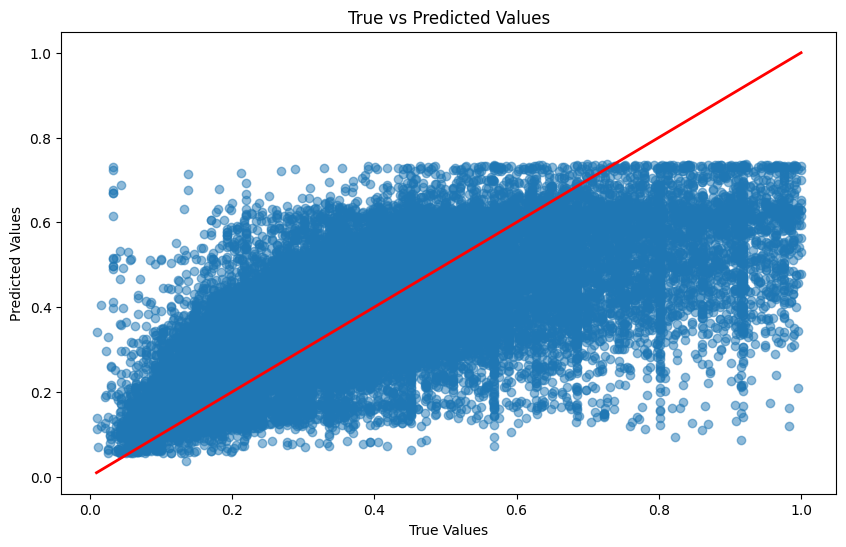

In [53]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

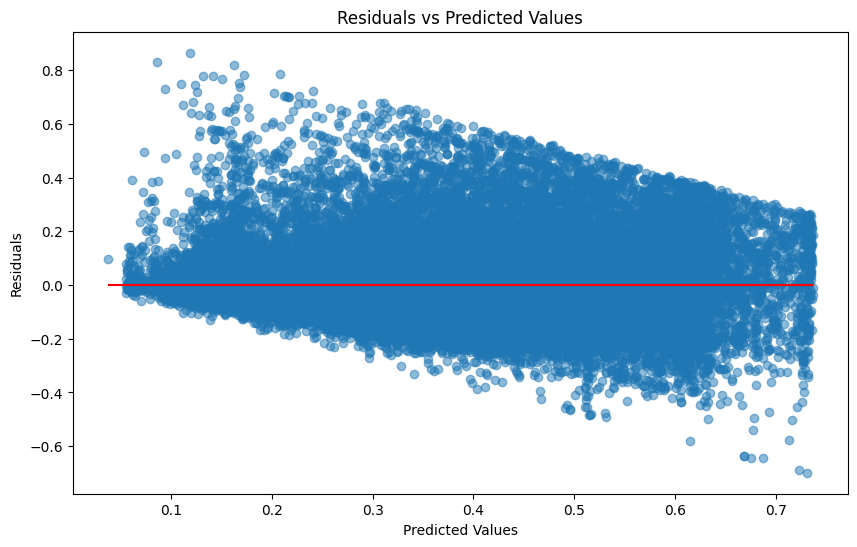

In [54]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

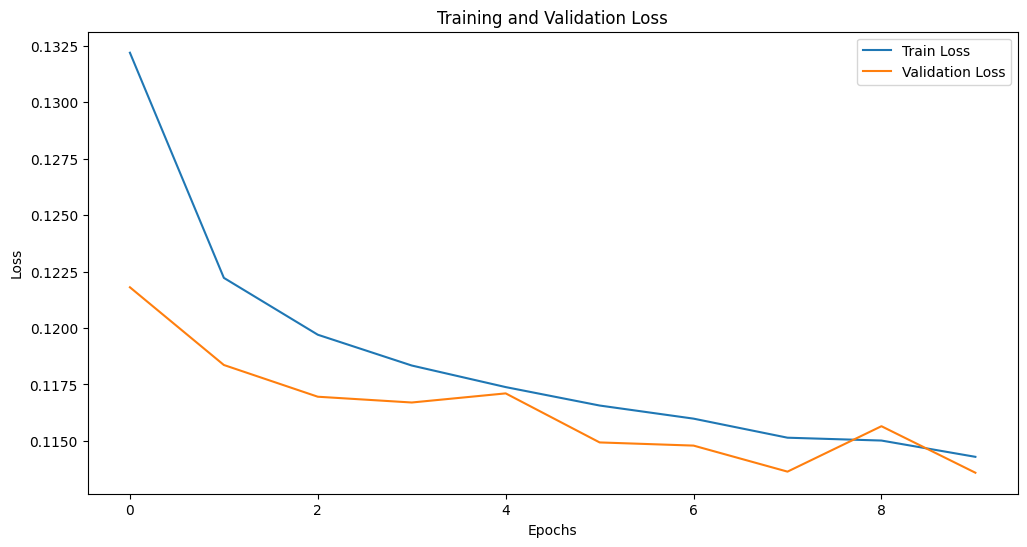

In [55]:
# Plotting training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

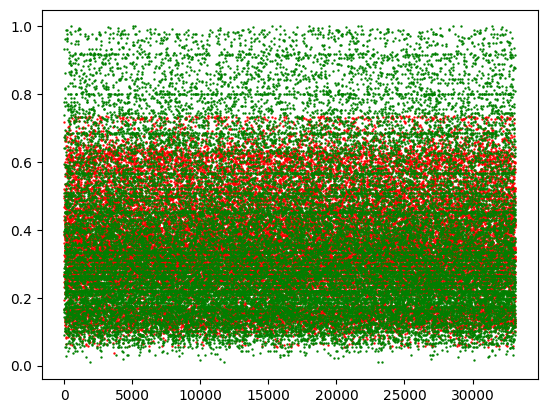

In [56]:
plt.scatter(range(len(X_test)), y_pred, color='red', s=0.5)
plt.scatter(range(len(X_test)),y_test, color='green', s=0.5)
plt.show()

# 6. Save the Document the final model

In [57]:
model.save('final_version1.keras')

# 7. Final Conclusion

To improve we can :
1. Analysis the data in few cities could make performance better,
2. 